In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import allantools

DEVICE SETTINGS (see data sheet)...

Cycle count [x, y, z]: [800, 800, 800] ; Measurement rate: 0x96

Mean sampling rate: 34.32968053617903 Hz.


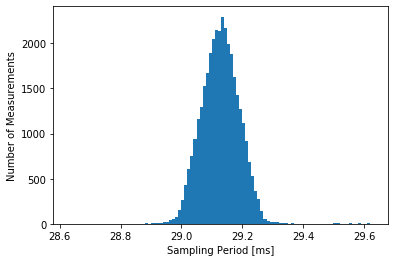

In [21]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX = np.loadtxt('mag_data.txt', usecols=0, skiprows=1)
magY = np.loadtxt('mag_data.txt', usecols=1, skiprows=1)
magZ = np.loadtxt('mag_data.txt', usecols=2, skiprows=1)
magn = np.loadtxt('mag_data.txt', usecols=3, skiprows=1)
time = np.loadtxt('mag_data.txt', usecols=4, skiprows=1)
sampling_period = np.loadtxt('mag_data.txt', usecols=5, skiprows=2)

# Define the sampling period as the mean Δt between measurements
tau_0 = np.mean(sampling_period)

# Print device settings
print('DEVICE SETTINGS (see data sheet)...\n')
with open('mag_data.txt', 'r') as file:
    print(file.readline())
print('Mean sampling rate: ' + str(1/tau_0) + ' Hz.')

# Histogram of sampling periods
plt.figure(0)
plt.hist(sampling_period*10**3, 100, range=(tau_0*10**3 - .5, tau_0*10**3 + .5))
plt.xlabel('Sampling Period [ms]')
plt.ylabel('Number of Measurements')
plt.show()

# Compute overlapping Allan variance for B_x, B_y, B_z, and |B|
(tauX, adevX, adev_errorX, nX) = allantools.oadev(magX, rate=1/tau_0, taus='all')
(tauY, adevY, adev_errorY, nY) = allantools.oadev(magY, rate=1/tau_0, taus='all')
(tauZ, adevZ, adev_errorZ, nZ) = allantools.oadev(magZ, rate=1/tau_0, taus='all')
(tau, adev, adev_error, n) = allantools.oadev(magn, rate=1/tau_0, taus='all')

# Compute standard deviation and mean of the measurements
stdX = np.std(magX)
stdY = np.std(magY)
stdZ = np.std(magZ)
std = np.std(magn)
meanX = np.mean(magX)
meanY = np.mean(magY)
meanZ = np.mean(magZ)
mean = np.mean(magn)

# Compute spectral density
(fX, psdX) = sp.signal.periodogram(magX, fs=1/tau_0)
(fY, psdY) = sp.signal.periodogram(magY, fs=1/tau_0)
(fZ, psdZ) = sp.signal.periodogram(magZ, fs=1/tau_0)
(f, psd) = sp.signal.periodogram(magn, fs=1/tau_0)

# B_x

Mean of measurements: 39694.87514418876 nT.
Standard deviation of measurements: 69.42150668113388 nT.


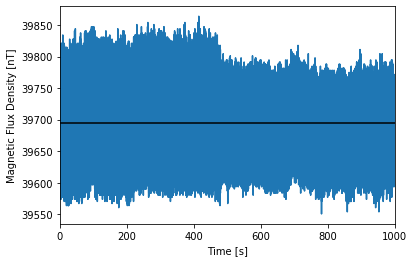

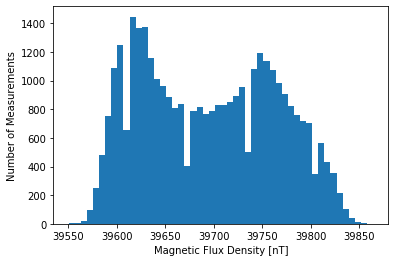

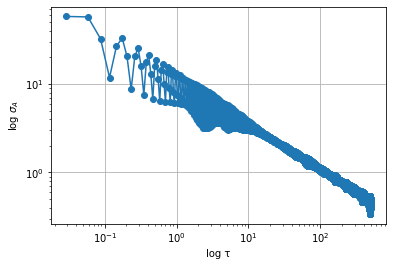

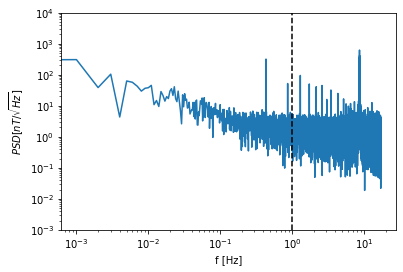

Noise floor at 1 Hz: 2.276197152376473 nT * Hz^(-1/2).


In [22]:
print('Mean of measurements: ' + str(meanX) + ' nT.')
print('Standard deviation of measurements: ' + str(stdX) + ' nT.')

# B_x vs time
plt.figure(1)
plt.plot(time, magX, zorder=1)
plt.hlines(meanX, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(2)
plt.hist(magX, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(3)
plt.loglog(tauX, np.sqrt(adevX), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(4)
plt.loglog(fX, np.sqrt(psdX), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdX[np.searchsorted(fX, 1., side="left")])) + ' nT * Hz^(-1/2).')

# B_y

Mean of measurements: 23124.332525487913 nT.
Standard deviation of measurements: 76.63406782466706 nT.


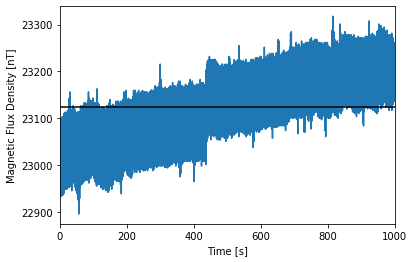

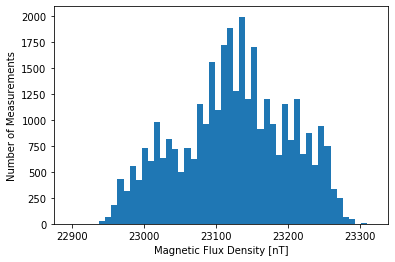

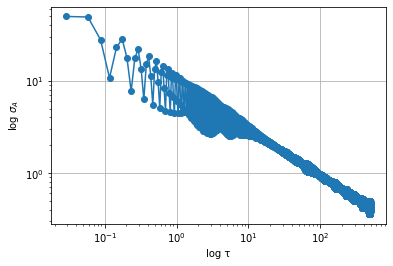

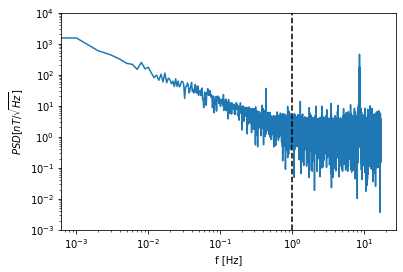

Noise floor at 1 Hz: 1.0294071207232633 nT * Hz^(-1/2).


In [23]:
print('Mean of measurements: ' + str(meanY) + ' nT.')
print('Standard deviation of measurements: ' + str(stdY) + ' nT.')

# B_y vs time
plt.figure(5)
plt.plot(time, magY, zorder=1)
plt.hlines(meanY, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(6)
plt.hist(magY, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(7)
plt.loglog(tauY, np.sqrt(adevY), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(8)
plt.loglog(fY, np.sqrt(psdY), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdY[np.searchsorted(fY, 1., side="left")])) + ' nT * Hz^(-1/2).')

# B_z

Mean of measurements: -9305.695857850276 nT.
Standard deviation of measurements: 51.650899170437114 nT.


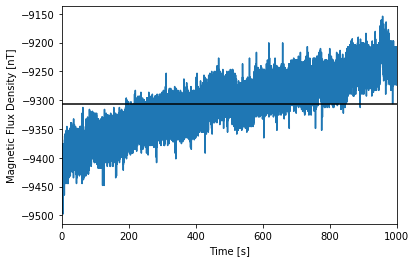

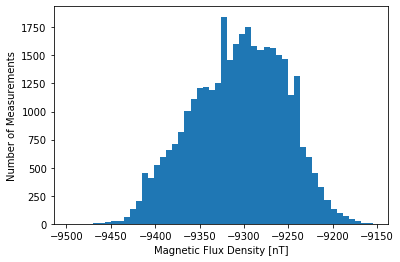

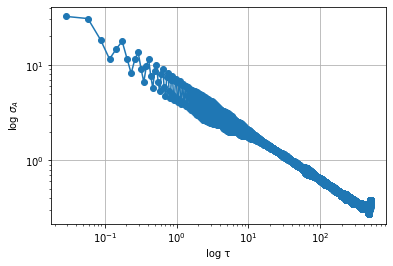

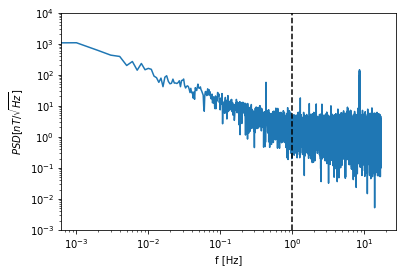

Noise floor at 1 Hz: 1.7856594995622765 nT * Hz^(-1/2).


In [24]:
print('Mean of measurements: ' + str(meanZ) + ' nT.')
print('Standard deviation of measurements: ' + str(stdZ) + ' nT.')

# B_z vs time
plt.figure(9)
plt.plot(time, magZ, zorder=1)
plt.hlines(meanZ, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(10)
plt.hist(magZ, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(11)
plt.loglog(tauZ, np.sqrt(adevZ), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(12)
plt.loglog(fZ, np.sqrt(psdZ), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdZ[np.searchsorted(fZ, 1., side="left")])) + ' nT * Hz^(-1/2).')

# |B|

Mean of measurements: 46872.442246900995 nT.
Standard deviation of measurements: 36.8864899631919 nT.


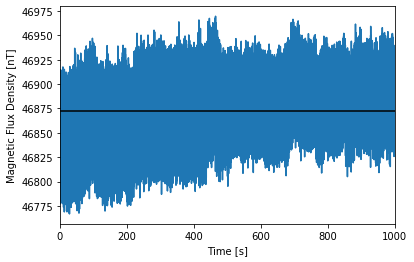

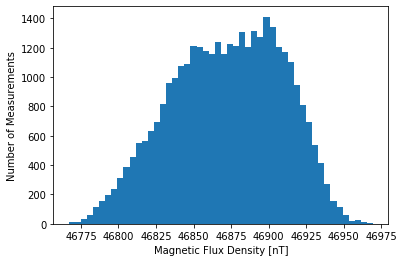

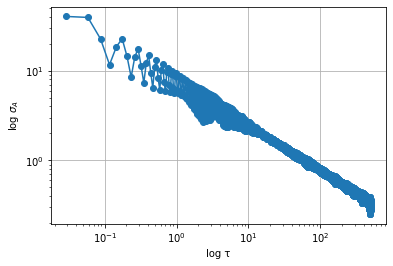

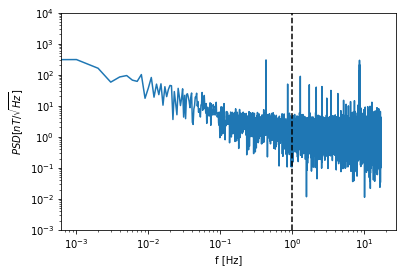

Noise floor at 1 Hz: 1.6395076385847727 nT * Hz^(-1/2).


In [25]:
print('Mean of measurements: ' + str(mean) + ' nT.')
print('Standard deviation of measurements: ' + str(std) + ' nT.')

# |B| vs time
plt.figure(13)
plt.plot(time, magn, zorder=1)
plt.hlines(mean, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(14)
plt.hist(magn, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(15)
plt.loglog(tau, np.sqrt(adev), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(16)
plt.loglog(f, np.sqrt(psd), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psd[np.searchsorted(f, 1., side="left")])) + ' nT * Hz^(-1/2).')

# |B| for shorter data set (first 10s of data)

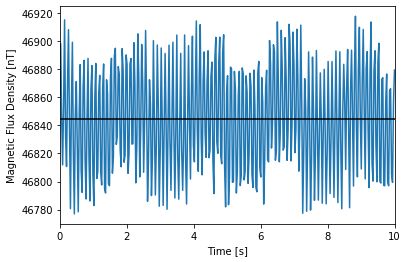

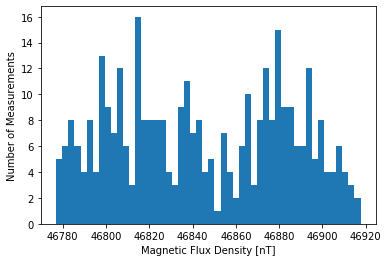

In [26]:
idx_10s = np.searchsorted(time, 10., side="left")

# |B| vs time
plt.figure(15)
plt.plot(time[0:idx_10s], magn[0:idx_10s], zorder=1)
plt.hlines(np.mean(magn[0:idx_10s]), 0, 10, zorder=2)
plt.xlim(0, 10)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(16)
plt.hist(magn[0:idx_10s], 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# Analysis of a different data set. Trying to isolate 60 Hz noise.

DEVICE SETTINGS (see data sheet)...

# Cycle count [x, y, z]: [800, 800, 800] ; Measurement rate: 30 Hz

Mean sampling rate: 29.639219761704165 Hz.


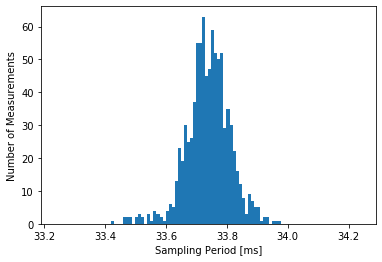

In [27]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX_short = np.loadtxt('mag_data_short.txt', usecols=0, skiprows=1)
magY_short = np.loadtxt('mag_data_short.txt', usecols=1, skiprows=1)
magZ_short = np.loadtxt('mag_data_short.txt', usecols=2, skiprows=1)
magn_short = np.loadtxt('mag_data_short.txt', usecols=3, skiprows=1)
time_short = np.loadtxt('mag_data_short.txt', usecols=4, skiprows=1)
sampling_period_short = np.loadtxt('mag_data_short.txt', usecols=5, skiprows=2)

# Define the sampling period as the mean Δt between measurements
tau_0_short = np.mean(sampling_period_short)

# Print device settings
print('DEVICE SETTINGS (see data sheet)...\n')
with open('mag_data_short.txt', 'r') as file:
    print(file.readline())
print('Mean sampling rate: ' + str(1/tau_0_short) + ' Hz.')

# Histogram of sampling periods
plt.figure(17)
plt.hist(sampling_period_short*10**3, 100, range=(tau_0_short*10**3 - .5, tau_0_short*10**3 + .5))
plt.xlabel('Sampling Period [ms]')
plt.ylabel('Number of Measurements')
plt.show()

# Compute standard deviation and mean of the measurements
stdX_short = np.std(magX_short)
stdY_short = np.std(magY_short)
stdZ_short = np.std(magZ_short)
std_short = np.std(magn_short)
meanX_short = np.mean(magX_short)
meanY_short = np.mean(magY_short)
meanZ_short = np.mean(magZ_short)
mean_short = np.mean(magn_short)

# Compute spectral density
(fX_short, psdX_short) = sp.signal.periodogram(magX_short, fs=1/tau_0_short)
(fY_short, psdY_short) = sp.signal.periodogram(magY_short, fs=1/tau_0_short)
(fZ_short, psdZ_short) = sp.signal.periodogram(magZ_short, fs=1/tau_0_short)
(f_short, psd_short) = sp.signal.periodogram(magn_short, fs=1/tau_0_short)

Mean of measurements: 23890.113670275554 nT.
Standard deviation of measurements: 11.484877139079156 nT.


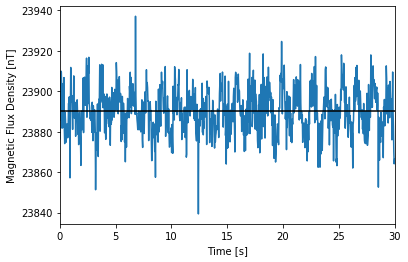

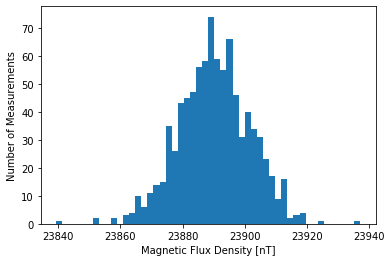

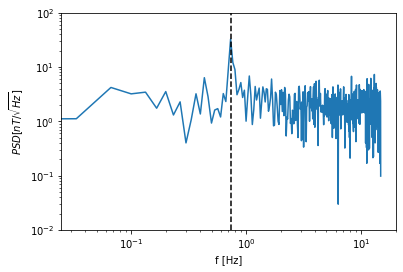

Maximum power density occurs at 0.7326548705140355 Hz.
For 60 Hz noise, we should expect alias frequency at 0.7215604765916694 Hz.


In [28]:
print('Mean of measurements: ' + str(mean_short) + ' nT.')
print('Standard deviation of measurements: ' + str(std_short) + ' nT.')

# |B| vs time
plt.figure(18)
plt.plot(time_short, magn_short, zorder=1)
plt.hlines(mean_short, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(19)
plt.hist(magn_short, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(20)
plt.loglog(f_short, np.sqrt(psd_short), zorder=1)
max_idx = np.argmax(psd_short)
plt.vlines(f_short[max_idx], 10**-2, 10**2, linestyles='dashed', zorder=2)
plt.ylim(10**-2,10**2)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Maximum power density occurs at ' + str(f_short[max_idx]) + ' Hz.')
print('For 60 Hz noise, we should expect alias frequency at ' + str(abs(60 - 2/tau_0_short)) + ' Hz.')

Calculated parameters for fitted 60Hz sine wave (see fit_func1): 
[-1.07258367e+00  1.00555240e+00  2.38901054e+04  5.99009782e+01]
Calculated parameters for fitted 120Hz sine wave (see fit_func2): 
[1.05116882e+00 9.99722469e-01 2.38901132e+04 1.19995902e+02]
Calculated parameters for fitted 180Hz sine wave (see fit_func3): 
[6.19016765e-01 1.00415316e+00 2.38901146e+04 1.79966993e+02]


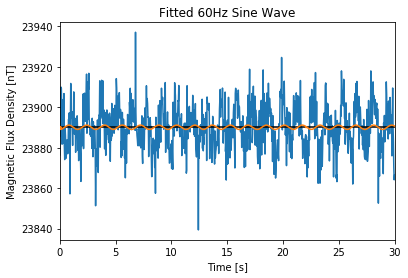

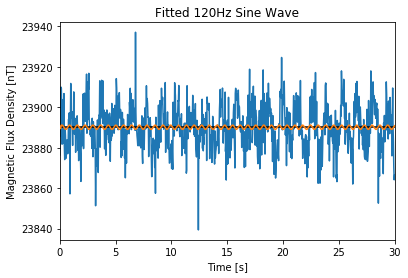

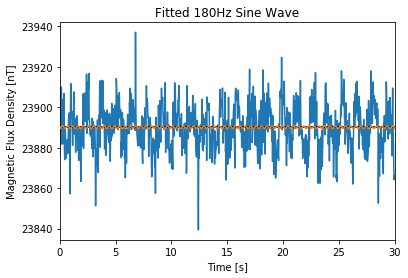

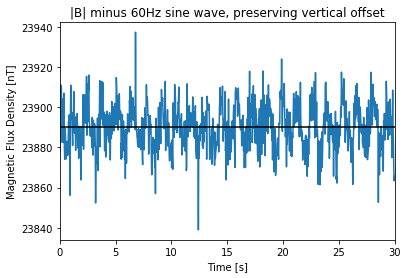

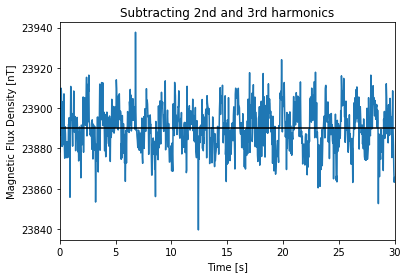

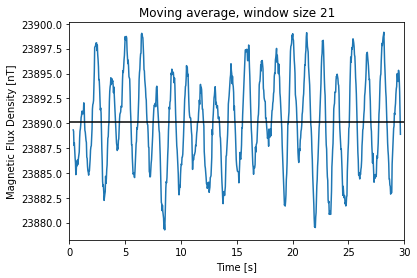

In [29]:
# Define general 60 Hz sine wave for fitting
def fit_func1(t1, a1, b1, c1, f1):
    return a1 * np.sin(f1*2*np.pi*(t1 + b1)) + c1
# Define general 120 Hz sine wave for fitting
def fit_func2(t2, a2, b2, c2, f2):
    return a2 * np.sin(f2*2*np.pi*(t2 + b2)) + c2
# Define general 180 Hz sine wave for fitting
def fit_func3(t3, a3, b3, c3, f3):
    return a3 * np.sin(f3*2*np.pi*(t3 + b3)) + c3

# Fit a 60 Hz sine wave to the data
params1, params_covariance1 = sp.optimize.curve_fit(fit_func1, time_short, magn_short, p0=[1,1,1,60])
print('Calculated parameters for fitted 60Hz sine wave (see fit_func1): ')
print(params1)
# Fit a 120 Hz sine wave to the data
params2, params_covariance2 = sp.optimize.curve_fit(fit_func2, time_short, magn_short, p0=[1,1,1,120])
print('Calculated parameters for fitted 120Hz sine wave (see fit_func2): ')
print(params2)
# Fit a 180 Hz sine wave to the data
params3, params_covariance3 = sp.optimize.curve_fit(fit_func3, time_short, magn_short, p0=[1,1,1,180])
print('Calculated parameters for fitted 180Hz sine wave (see fit_func3): ')
print(params3)

# |B| vs time, with a fitted 60 Hz sine wave
plt.figure(21)
plt.plot(time_short, magn_short, zorder=1)
plt.hlines(mean_short, 0, 30, zorder=2)
plt.plot(time_short, fit_func1(time_short, params1[0], params1[1], params1[2], params1[3]), zorder=3)
plt.xlim(0, 30)
plt.title('Fitted 60Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# |B| vs time, with a fitted 120 Hz sine wave
plt.figure(22)
plt.plot(time_short, magn_short, zorder=1)
plt.hlines(mean_short, 0, 30, zorder=2)
plt.plot(time_short, fit_func2(time_short, params2[0], params2[1], params2[2], params2[3]), zorder=3)
plt.xlim(0, 30)
plt.title('Fitted 120Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# |B| vs time, with a fitted 180 Hz sine wave
plt.figure(23)
plt.plot(time_short, magn_short, zorder=1)
plt.hlines(mean_short, 0, 30, zorder=2)
plt.plot(time_short, fit_func3(time_short, params3[0], params3[1], params3[2], params3[3]), zorder=3)
plt.xlim(0, 30)
plt.title('Fitted 180Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Subtract the 60 Hz sine wave from |B|, preserving the vertical offset
adjusted_magn1 = magn_short - fit_func1(time_short, params1[0], params1[1], params1[2], params1[3]) + params1[2]
adjusted_mean1 = np.mean(adjusted_magn1)

# |B| vs time, minus the 60 Hz sine wave
plt.figure(24)
plt.plot(time_short, adjusted_magn1, zorder=1)
plt.hlines(adjusted_mean1, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('|B| minus 60Hz sine wave, preserving vertical offset')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Subtract the 120 & 180 Hz sine waves from |B|, preserving the vertical offset
adjusted_magn2 = (adjusted_magn1 - fit_func2(time_short, params2[0], params2[1], params2[2], params2[3]) + params2[2]
                  - fit_func3(time_short, params3[0], params3[1], params3[2], params3[3]) + params3[2])
adjusted_mean2 = np.mean(adjusted_magn2)

# |B| vs time, minus the 60, 120, & 180 Hz sine waves
plt.figure(25)
plt.plot(time_short, adjusted_magn2, zorder=1)
plt.hlines(adjusted_mean2, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Subtracting 2nd and 3rd harmonics')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Define moving average function
def moving_average(data_set, periods):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

# Take moving average of adjusted data
window = 21
adjusted_magn_ma = moving_average(adjusted_magn2, window)
adjusted_mean_ma = np.mean(adjusted_magn_ma)

# |B| vs time, minus the 60, 120, & 180 Hz sine waves, averaged
plt.figure(27)
plt.plot(time_short[int((window-1)/2):int(-(window-1)/2)], adjusted_magn_ma, zorder=1)
plt.hlines(adjusted_mean_ma, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Moving average, window size ' + str(window))
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()